# Web Scraping for Health and Profit

In this assignment, you will play the role of an analyst for a healthcare investment company. Your firm believes there to be valuable investment opportunities in startups based in locations for which there is a plethora of mature health care companies and a high density of hospitals. To this end, the company has asked you to conduct an analysis of the following: 

- Identify cities with the largest number of healthcare companies in the S&P 500.
- Identify the healthcare companies with the highest and lowest stock value.

In order to complete the above tasks, your manager has asked you to scrape **Wikipedia's page** on the list of S&P 500 Companies and filter for only health care companies. She has also asked you to scrape **Business Insider’s page** on stocks to retrieve stock prices. Ultimately you will create two DataFrames - the first from the Wikipedia data and the second from Business Insider data - and will merge them together to complete your analysis.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

## Part 1: Scraping Data from Wikipedia 

### Scraping S&P Companies Across All Industries 

First, let's scrape all of the companies on [Wikipedia's page](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) of the list of S&P 500 Companies. For this assignment, we will only be using the first value in the list of dataframes that we scrape. Follow the steps below. Follow the steps below:
- Use `.read_html()` to scrape the above Wikipedia page and store it into a variable called `scrape_result`
- Extract only the first table from the scraped list and store into a variable called `df`
- Preview the first five rows of `df`

In [2]:
#TODO: Scrape the Wikipedia page and store into a variable, `scrape_result`
scrape_result = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
#TODO: Extract first table from scraped list and store into a variable called `df`
df = scrape_result[0]
#TODO: Preview first five rows of `df`
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


### Filtering For Only Health Care Companies 


Next, we'll filter for only health care companies; i.e. companies whose `GICS Sector` is Health Care. Follow the steps below:

- Create a filter that contains companies with a `GICS Sector` of "Health Care", and save the results to a variable called `health_companies`
- Preview the first five rows of `health_companies`

In [3]:
# TODO: Create a filter, `health_companies`, that contains companies with a `GICS Sector` of "Health Care
health_companies = df[df["GICS Sector"]== "Health Care"] 
# TODO: Preview first five rows of `health_companies`
health_companies.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
12,A,Agilent Technologies,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
18,ALGN,Align Technology,Health Care,Health Care Supplies,"Tempe, Arizona",2017-06-19,1097149,1997
36,ABC,AmerisourceBergen,Health Care,Health Care Distributors,"Conshohocken, Pennsylvania",2001-08-30,1140859,1985


## Part 2: Scraping Business Insider for Stock Prices

Now, we need to scrape the Business Insider website for the current stock prices of companies. This is more complex than the previous scraping task, as it will involve creating and executing a function. You have been provided with the majority of the code for the function but will need to complete it. 

This function will carry out three major processes: First, it will make a request for the web page on Business Insider for the specified stock symbol. This page will contain information about the current pricing of the stock that we will collect using BeautifulSoup. The next section of the code will entail transforming the html of the page into a soup, from which we will extract our data. We'll isolate the HTML class containing the price information, then scrape the current price, absolute change in price, and relative change in price from that section. Finally, the function will return a dictionary containing all of the scraped information and the ticker so that we have a consistent data structure for use in other places of our code.

In order to complete this function, you'll need to add the code for finding and extracting the text for the four parts of the scrape, as well as adding the stored variables to the dictionary that will be returned from the function.

  - Open your web console
  - Isolate the section containing the stock pricing information by using a `.find()` for the price section. Store this into `price_section` for the following steps
  - Within the price_section, `.find()` the HTML class for the current price and store this into the variable `current_price`.
  - Within the price_section, `.find()` the HTML class for the absolute change and store this into the variable `absolute_change`.
  - Within the price_section, `.find()` the HTML class for the relative change and store this into the variable `relative_change`.
  - Add the `current_price`, `absolute_change`, and `relative_change` variables to the return dictionary for each of their respective keys.


**Hints:**
  - You'll need to `.strip()` the results on the text scrapes.
  - Don't forget to use your Chrome Inspector! You'll definitely want to check out the inside of the class tag `price-section__row`.
  - Remember: Isolate the section you want to get data out of, then pick the specific tags useful for extraction.
  - Don't forget to return values from your function!!

In [4]:
#TODO: Create a function that scrapes the business insider page and returns the price information of the requested stock
def scrape_stock(symbol):
 
    res = requests.get(f'https://markets.businessinsider.com/stocks/{symbol}-stock')
    #res = requests.get(f'https://markets.businessinsider.com/stocks/aapl')
   
    html = res.text

    soup = BeautifulSoup(html)

    price_section = soup.find_all(class_="price-section__row")
    
    raw_data = []
    
    for block in price_section:
    
        row = {
          
         "Symbol": (symbol),
         "Current_Price": block.find(class_="price-section__current-value").text.strip(),
         "Absolute_Change": block.find(class_="price-section__absolute-value").text.strip(),
         "Relative_Change": block.find(class_="price-section__relative-value").text.strip()
        }   
    return row

Once you've completed your function, test it by passing "AAPL" as a test case. Your executed function should return something similar to the following: 
```js
{
    'Symbol': 'AAPL',
    'Current_Price': '146.97',
    'Absolute_Change': '+0.14',
    'Relative_Change': '+0.10%'
}

```


In [5]:
# TODO: Execute `scrape_stock` with the argument "AAPL"
scrape_stock("AAPL")

{'Symbol': 'AAPL',
 'Current_Price': '152.69',
 'Absolute_Change': '+0.77',
 'Relative_Change': '+0.51%'}

Next, you will create a DataFrame that contains stock information for the companies in our `health_companies` dataframe. To do this, you will first create a list that contains all the `Symbol` column values from `health_companies`. You will then create an empty list called `results`, and create a `for` loop that iterates over the list of symbols and appends **X** to the `results` lists. You will need to use the `scrape_stock` function in your `for_loop`. 

Lastly, you will convert your `results` list into a DataFrame called `stock_price`, and you will preview the first five rows of this DataFrame.


In order to complete this task, follow the steps below.

- Create a `health_company_list` that contains all the `Symbol` column values in our `health_companies` data frame
- Create an empty list called `results`
- Create a `for` loop that iterate over `health_company_list`. In each iteration you must call the `scrape_stock()` function on the company symbol and append the return value to the `results` lists 
- Convert your `results` list into a DataFrame `stock_price`
- Preview the first few rows of your DataFrame using .head()

In [6]:
# TODO: Create `health_company_list` that contains `Symbol` column values from `health_companies` 
health_company_list = health_companies['Symbol']      #.tolist()
# TODO:  Create an empty list called `results` 
results = []
# TODO: Iterate over `health_company_list`
for symbol in health_company_list:
    # TODO: append each scraped stock price to the `results` list
    scraped_result = scrape_stock(symbol)
    results.append(scraped_result)
# TODO: Convert `results` to a DataFrame called `stock_price`
stock_price = pd.DataFrame(results)
# TODO: Preview first five rows of `stock_price`
stock_price.head()

,Symbol,Current_Price,Absolute_Change,Relative_Change
0,ABT,108.07,-2.13,-1.93%
1,ABBV,149.07,+4.47,+3.09%
2,A,153.04,-1.36,-0.88%
3,ALGN,328.08,-6.75,-2.02%
4,ABC,155.72,-2.17,-1.37%


## Part 3: Combining DataFrames

Next, you wlll join the `stock_price` DataFrame into the `health_companies` DataFrame. Follow the steps below.
- Use `.join()` to join `stock_price` and `health_companies` using `Symbol` as the join column and save the result into a variable called `full_data`
- Preview the first five rows of `full_data` to ensure that the merge was successful


In [7]:
# TODO: Merge `stock_price` and `health_companies` on `Symbol` and save as a variable titled `full_data`
#full_data = pd.merge(stock_price,health_companies,on='Symbol')
full_data = stock_price.join(health_companies.set_index('Symbol'),on = 'Symbol')
# TODO: Preview first five elements of `full_data`
full_data.head()

,Symbol,Current_Price,Absolute_Change,Relative_Change,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,ABT,108.07,-2.13,-1.93%,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
1,ABBV,149.07,+4.47,+3.09%,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
2,A,153.04,-1.36,-0.88%,Agilent Technologies,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
3,ALGN,328.08,-6.75,-2.02%,Align Technology,Health Care,Health Care Supplies,"Tempe, Arizona",2017-06-19,1097149,1997
4,ABC,155.72,-2.17,-1.37%,AmerisourceBergen,Health Care,Health Care Distributors,"Conshohocken, Pennsylvania",2001-08-30,1140859,1985


## Part 4: Identifying Highest Stock Prices

In this part, you will identify the companies that command the highest and lowest stock prices. In order to this, follow the steps below:
- Clean the data in `Current_Price` column to remove any commas and then convert the data to a float. 
- Sort `full_data` by current stock price in ascending order 
- Use `tail` to identify the lowest and highest prices, respectively


**Hints**: 
- Use `.str.replace()` on `Current_Price` column to remove commas 
- Use `.as_type()`to convert string values to float.


In [8]:
# TODO: Update `full_data` by removing commas from `Current Price` values
full_data['Current_Price'] = full_data['Current_Price'].str.replace(",","").astype(float)
# TODO: Update `full_data` by converting all `Current Price` values to strings 
full_data['Current_Price'] = full_data['Current_Price'].astype(str)

In [9]:
# TODO: Sort `full_data` by current stock price in ascending order and save to a variable called `sorted_data`
sorted_data = full_data.sort_values("Current_Price", ascending=False)
# TODO: Display the first five records in the sorted dataset
sorted_data.head()

,Symbol,Current_Price,Absolute_Change,Relative_Change,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
19,CVS,90.09,+1.13,+1.27%,CVS Health,Health Care,Health Care Services,"Woonsocket, Rhode Island",1957-03-04,64803,1996
30,HSIC,86.08,-0.66,-0.76%,Henry Schein,Health Care,Health Care Distributors,"Melville, New York",2015-03-17,1000228,1932
28,GILD,85.71,+0.04,+0.05%,Gilead Sciences,Health Care,Biotechnology,"Foster City, California",2004-07-01,882095,1987
41,MDT,84.51,-1.67,-1.94%,Medtronic,Health Care,Health Care Equipment,"Dublin, Ireland",1986-10-31,1613103,1949
31,HOLX,83.5,-2.11,-2.46%,Hologic,Health Care,Health Care Equipment,"Marlborough, Massachusetts",2016-03-30,859737,1985


In [10]:
# TODO: Preview last five rows of `sorted data`
sorted_data.tail()

,Symbol,Current_Price,Absolute_Change,Relative_Change,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
62,ZBH,128.29,-2.47,-1.89%,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
59,VTRS,11.72,-0.20,-1.68%,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
0,ABT,108.07,-2.13,-1.93%,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
23,DXCM,107.17,-2.67,-2.43%,Dexcom,Health Care,Health Care Equipment,"San Diego, California",2020-05-12,1093557,1999
42,MRK,106.92,+0.27,+0.25%,Merck & Co.,Health Care,Pharmaceuticals,"Kenilworth, New Jersey",1957-03-04,310158,1891


Using the results above, which company has the highest stock price? 

In [11]:
# TODO: Display the name of the top priced stock
top_priced_stock = sorted_data["Symbol"]
top_priced_stock.head(1)

19    CVS
Name: Symbol, dtype: object

In which cities are the top five companies by stock price located?

In [12]:
# TODO: Display the name of the five cities with the highest priced stocks
highest_priced_stocks = sorted_data['Headquarters Location']
highest_priced_stocks.head()

19      Woonsocket, Rhode Island
30            Melville, New York
28       Foster City, California
41               Dublin, Ireland
31    Marlborough, Massachusetts
Name: Headquarters Location, dtype: object

## Part 5: Health Care Company Clusters

Next, we want to plot a geographic clustering of Health Care companies from our `full_data` DataFrame. 

Complete the following steps: 
- Use `.value_counts()` on the `Headquarters Location` column of `full_data`. Set this dataframe to a variable `health_company_locations`.
- Filter `health_company_locations` for cities that have a count of more than one company. Set this to a variable `health_company_clusters`.
- Create a bar chart that simply plots values of `health_company_clusters` using pandas' `.plot()` method.


In [13]:
# TODO: Use `.value_counts()` on the `Headquarters Location` column of `full_data` and save as a variable `health_company_locations`
health_company_locations = full_data['Headquarters Location'].value_counts()
# TODO: preview your results using .head()
health_company_locations.head()

San Diego, California         3
Cambridge, Massachusetts      3
North Chicago, Illinois       2
Indianapolis, Indiana         2
Marlborough, Massachusetts    2
Name: Headquarters Location, dtype: int64

In [14]:
# TODO:  Filter `health_company_locations` for cities that have a count of more than one company and store as the variable `health_company_clusters`
health_company_clusters = health_company_locations[full_data['Headquarters Location'].value_counts()>1]
# TODO: Preview first five rows of `health_company_clusters`
health_company_clusters.head()

San Diego, California         3
Cambridge, Massachusetts      3
North Chicago, Illinois       2
Indianapolis, Indiana         2
Marlborough, Massachusetts    2
Name: Headquarters Location, dtype: int64

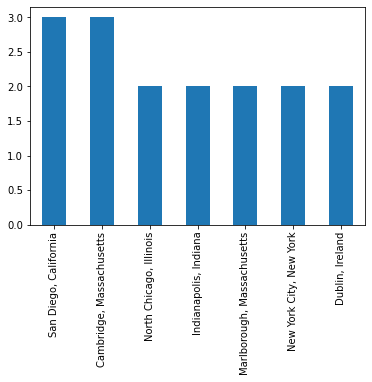

In [15]:
# TODO: Create a bar plot of `health_company_clusters`
import matplotlib.pyplot as plt

health_company_clusters.head(7).plot(kind='bar') 

plt.show()

Which three cities have the highest concentration of health care companies?

In [16]:
# TODO: List the three cities with the highest concentration of health care companies
health_company_clusters.head(3)                                   

San Diego, California       3
Cambridge, Massachusetts    3
North Chicago, Illinois     2
Name: Headquarters Location, dtype: int64